## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
# from napari_convpaint.conv_paint_utils import *
# from napari_convpaint.conv_paint_model import *
# from napari_convpaint.conv_paint_param import Param
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import napari
from skimage import morphology
import seaborn as sns
import pandas as pd
from aicsimageio import AICSImage

from vetsuisse25_imaging import *
from vetsuisse25_data_handler import *

22-May-25 10:33:08 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


>>> GPU activated? NO


## Data loading and inspection

Get file paths

In [2]:
data = parse_image_filenames("../imaging_data/21122022_images_jinglecells_SO_AK")
display(data)

condition donor time       date replicate mode1 mode2  \
0       229E  BEC5  48h 2022-12-21        02   R3D   D3D   
1       229E  BEC5  48h 2022-12-21        03   R3D   D3D   
2       229E  BEC5  48h 2022-12-21      None   R3D   D3D   
3       229E  BEC6  48h 2022-12-21        01   R3D   D3D   
4     33mock  BEC5  48h 2022-12-21        02   R3D   D3D   
5     33mock  BEC6  48h 2022-12-21        01   R3D   D3D   
6     33mock  BEC6  48h 2022-12-21        02   R3D   D3D   
7     37mock  BEC5  48h 2022-12-21        01   R3D   D3D   
8     37mock  BEC5  48h 2022-12-21        03   R3D   D3D   
9     37mock  BEC5  48h 2022-12-21      None   R3D   D3D   
10    37mock  BEC6  48h 2022-12-21      None   R3D   D3D   
11      MERS  BEC5  48h 2022-12-21      None   R3D   D3D   
12      MERS  BEC5  48h 2023-12-21      None   R3D   D3D   
13      MERS  BEC6  48h 2022-12-21        01   R3D   D3D   

                                  filename  \
0     229E_BEC5_48h_21.12.22.02_R3D_D3D.dv   
1     229E_BEC5_48h_21.12.22.03_R3D_D3D.dv   
2        229E_BEC5_48h_21.12.22_R3D_D3D.dv   
3     229E_BEC6_48h_21.12.22.01_R3D_D3D.dv   
4   33mock_BEC5_48h_21.12.22.02_R3D_D3D.dv   
5   33mock_BEC6_48h_21.12.22.01_R3D_D3D.dv   
6   33mock_BEC6_48h_21.12.22.02_R3D_D3D.dv   
7   37mock_BEC5_48h_21.12.22.01_R3D_D3D.dv   
8   37mock_BEC5_48h_21.12.22.03_R3D_D3D.dv   
9      37mock_BEC5_48h_21.12.22_R3D_D3D.dv   
10     37mock_BEC6_48h_21.12.22_R3D_D3D.dv   
11       MERS_BEC5_48h_21.12.22_R3D_D3D.dv   
12       MERS_BEC5_48h_21.12.23_R3D_D3D.dv   
13    MERS_BEC6_48h_21.12.22.01_R3D_D3D.dv   

                                             filepath  
0   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
1   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
2   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
3   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
4   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
5   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
6   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
7   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
8   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
9   C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
10  C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
11  C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
12  C:\Users\roman\Documents\Vetsuisse\imaging_dat...  
13  C:\Users\roman\Documents\Vetsuisse\imaging_dat...

Load one image to inspect

In [3]:
# Load the image
imgs = [AICSImage(data["filepath"][i]) for i in range(len(data))]

# Show basic info
print("Shape:", imgs[0].dims)
print("Dimensions:", imgs[0].shape)  # shape: (T, C, Z, Y, X)

# Get the first timepoint, all channels for all images
imgs = [imgs[i].get_image_data("CZYX", T=0) for i in range(len(imgs))] # 4D image stack
print("Loaded array shape:", imgs[0].shape) # img_array is now a list of NumPy arrays

Shape: <Dimensions [T: 1, C: 4, Z: 68, Y: 960, X: 960]>
Dimensions: (1, 4, 68, 960, 960)
Loaded array shape: (4, 68, 960, 960)


In [4]:
# print(imgs[0].shape)
# for i in range(4):
#     print(imgs[0][i].min(), imgs[0][i].max(), imgs[0][i].mean(), imgs[0][i].std())

Show in napari

In [5]:
img_selection = [4,0,7,11]

In [ ]:
v = napari.Viewer()
z_stretch = 5

for i in img_selection[::-1]: # reverse order to have the first image on top
    img = imgs[i]
    v.add_image(img, name=data["filename"][i], colormap="gist_earth", scale=(1, z_stretch, 1, 1))

for l in v.layers:
    l.contrast_limits = (0, 15000)
    l.rendering = "mip"

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File c:\Users\roman\miniforge3\envs\ivi-env\Lib\site-packages\napari\_qt\threads\status_checker.py:114, in StatusChecker.calculate_status(self=<napari._qt.threads.status_checker.StatusChecker object>)
    110     return
    112 try:
    113     # Calculate the status change from cursor's movement
--> 114     res = viewer._calc_status_from_cursor()
        viewer = Viewer(camera=Camera(center=(167.5, 959.5, 959.5), zoom=0.28302083333333333, angles=(0.0, 0.0, 90.00000000000001), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 167.49999999999997, 1535.4293283315806, 1169.7318636640232), scaled=True, style=<CursorStyle.STANDARD: 'standard'>, size=1.0), dims=Dims(ndim=4, ndisplay=3, order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3'), rollable=(True, True, True, True), range=(RangeTuple(start=0.0, stop=3.0, s

## Create different projections (and normalize them)

In [27]:
mip_imgs, avg_imgs, med_imgs = [], [], []
# mip_norm, avg_norm, med_norm = [], [], []
# Create different projections and normalize them
for i in img_selection:
    img = imgs[i]
    mip_img = np.max(img, axis=1).astype(int)    # collapse along Z
    avg_img = np.mean(img, axis=1).astype(int)    # average along Z
    med_img = np.median(img, axis=1).astype(int)    # median along Z

    mip_imgs.append(mip_img.copy())
    avg_imgs.append(avg_img.copy())
    med_imgs.append(med_img.copy())

    # Normalize the images for better visualization
    # mip_img, avg_img, med_img = mip_img.astype(float), avg_img.astype(float), med_img.astype(float)
    # for c in range(3):
    #     mip_img[c] = (mip_img[c] - np.min(mip_img[c])) / (np.max(mip_img[c]) - np.min(mip_img[c]))
    #     avg_img[c] = (avg_img[c] - np.min(avg_img[c])) / (np.max(avg_img[c]) - np.min(avg_img[c]))
    #     med_img[c] = (med_img[c] - np.min(med_img[c])) / (np.max(med_img[c]) - np.min(med_img[c]))

    # mip_norm.append(mip_img.copy())
    # avg_norm.append(avg_img.copy())
    # med_norm.append(med_img.copy())

In [34]:
print(mip_imgs[0].max())
# print(mip_imgs[0].max(), "|", mip_norm[0].max())

45075


Print ranges and plot the images (channels separately)

Image number: 4 | 33mock_BEC5_48h_21.12.22.02_R3D_D3D.dv
MIP image range: ['Ch0: 10437 - 20799', 'Ch1: 1931 - 6173', 'Ch2: 1897 - 44006']
Average image range: ['Ch0: 8672 - 14656', 'Ch1: 1658 - 3058', 'Ch2: 1494 - 5994']
Median image range: ['Ch0: 7822 - 14989', 'Ch1: 1627 - 2996', 'Ch2: 1478 - 4010']


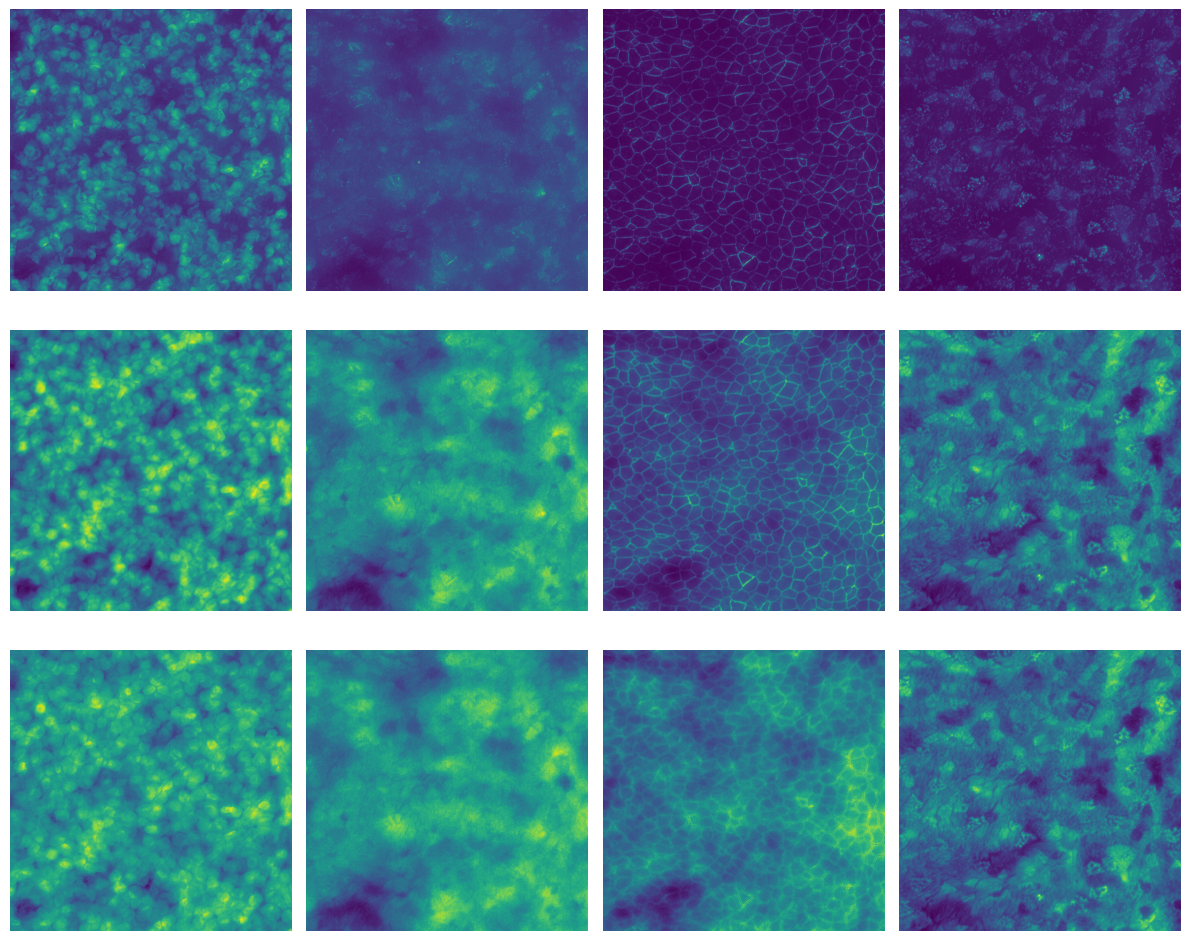

Image number: 0 | 229E_BEC5_48h_21.12.22.02_R3D_D3D.dv
MIP image range: ['Ch0: 9525 - 21740', 'Ch1: 342 - 31497', 'Ch2: 1513 - 37617']
Average image range: ['Ch0: 8088 - 15890', 'Ch1: 261 - 4413', 'Ch2: 1230 - 5119']
Median image range: ['Ch0: 7840 - 15971', 'Ch1: 251 - 1671', 'Ch2: 1198 - 3161']


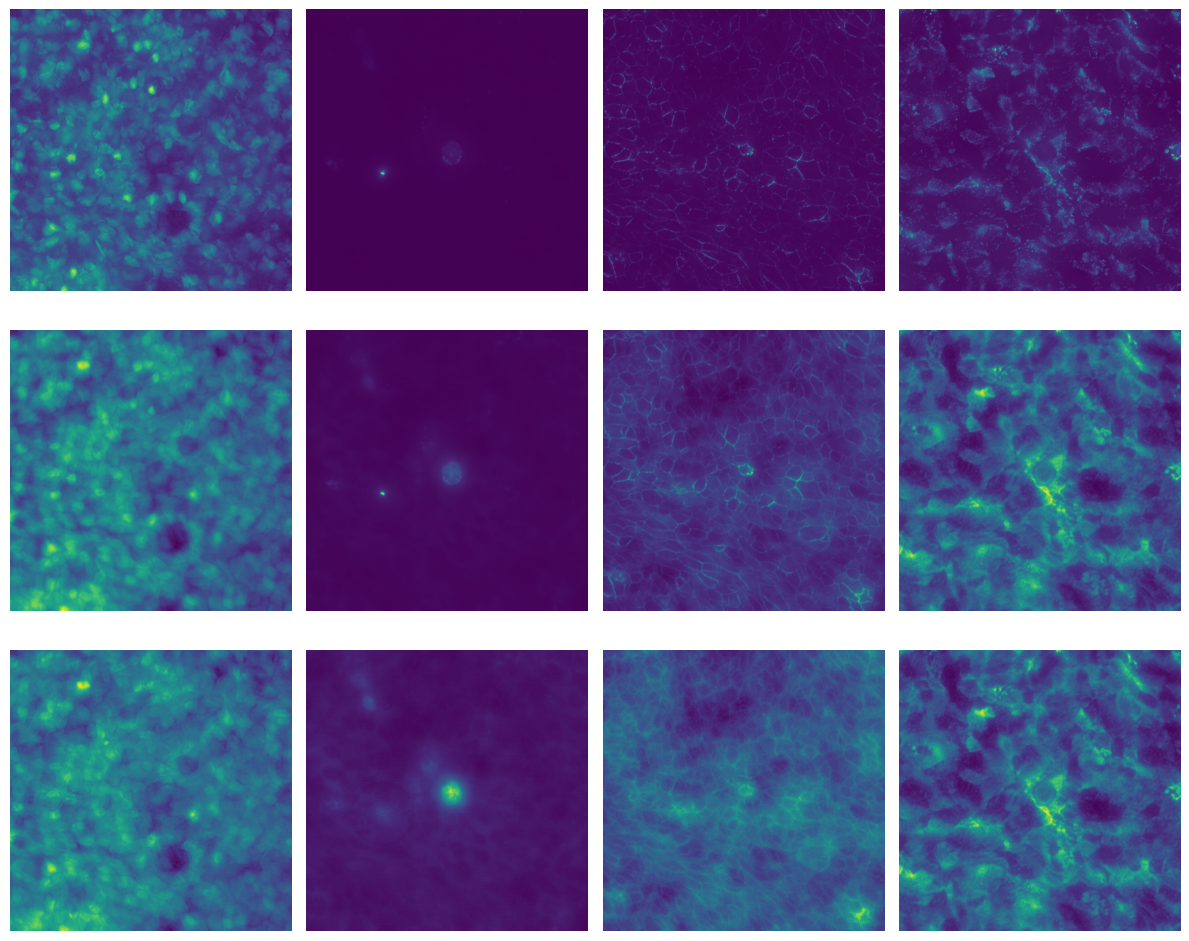

Image number: 7 | 37mock_BEC5_48h_21.12.22.01_R3D_D3D.dv
MIP image range: ['Ch0: 8378 - 16086', 'Ch1: 503 - 5095', 'Ch2: 1965 - 42860']
Average image range: ['Ch0: 7251 - 12359', 'Ch1: 383 - 759', 'Ch2: 1586 - 5831']
Median image range: ['Ch0: 6976 - 12293', 'Ch1: 369 - 632', 'Ch2: 1552 - 3886']


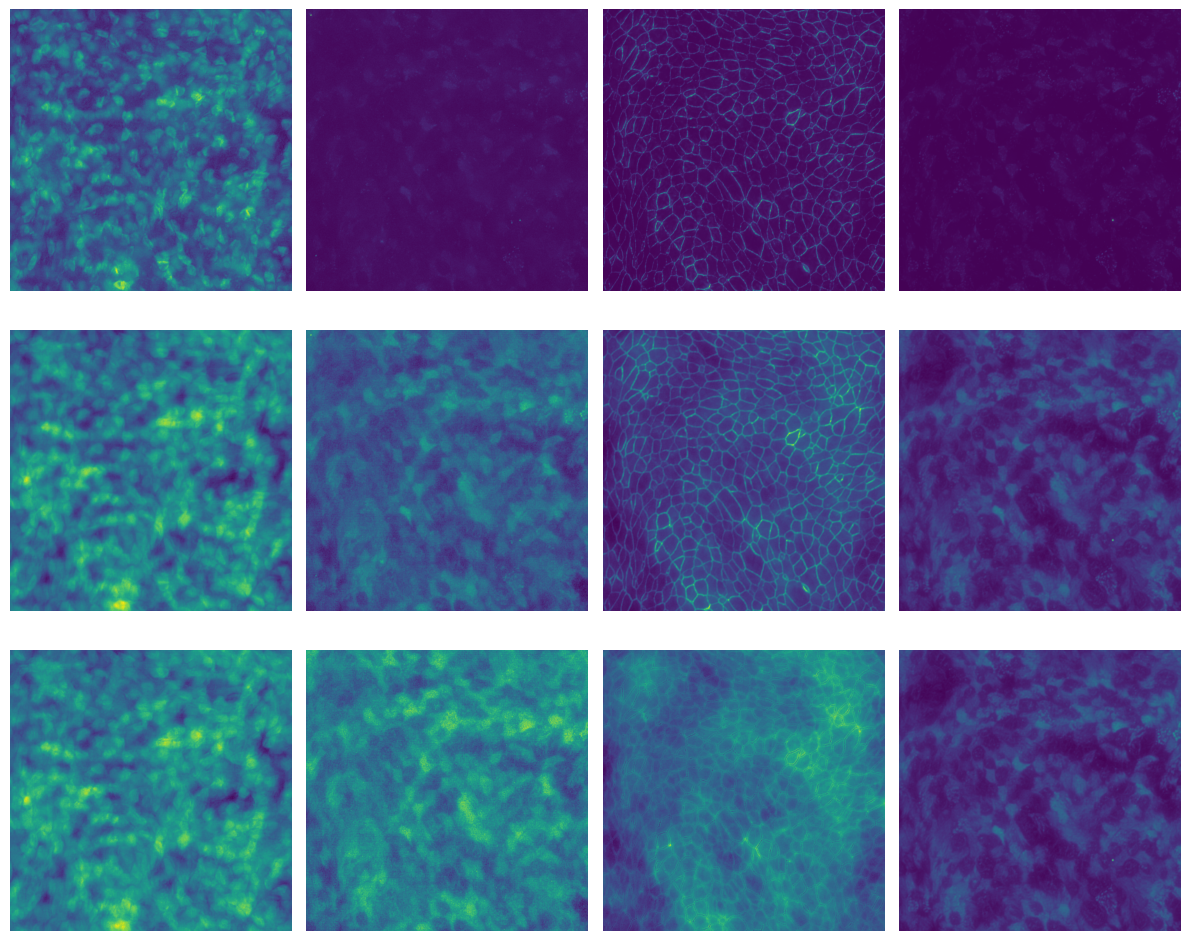

Image number: 11 | MERS_BEC5_48h_21.12.22_R3D_D3D.dv
MIP image range: ['Ch0: 7668 - 20362', 'Ch1: 643 - 28887', 'Ch2: 3072 - 24992']
Average image range: ['Ch0: 6733 - 12427', 'Ch1: 511 - 8924', 'Ch2: 2571 - 6390']
Median image range: ['Ch0: 6621 - 11968', 'Ch1: 495 - 7749', 'Ch2: 2543 - 5419']


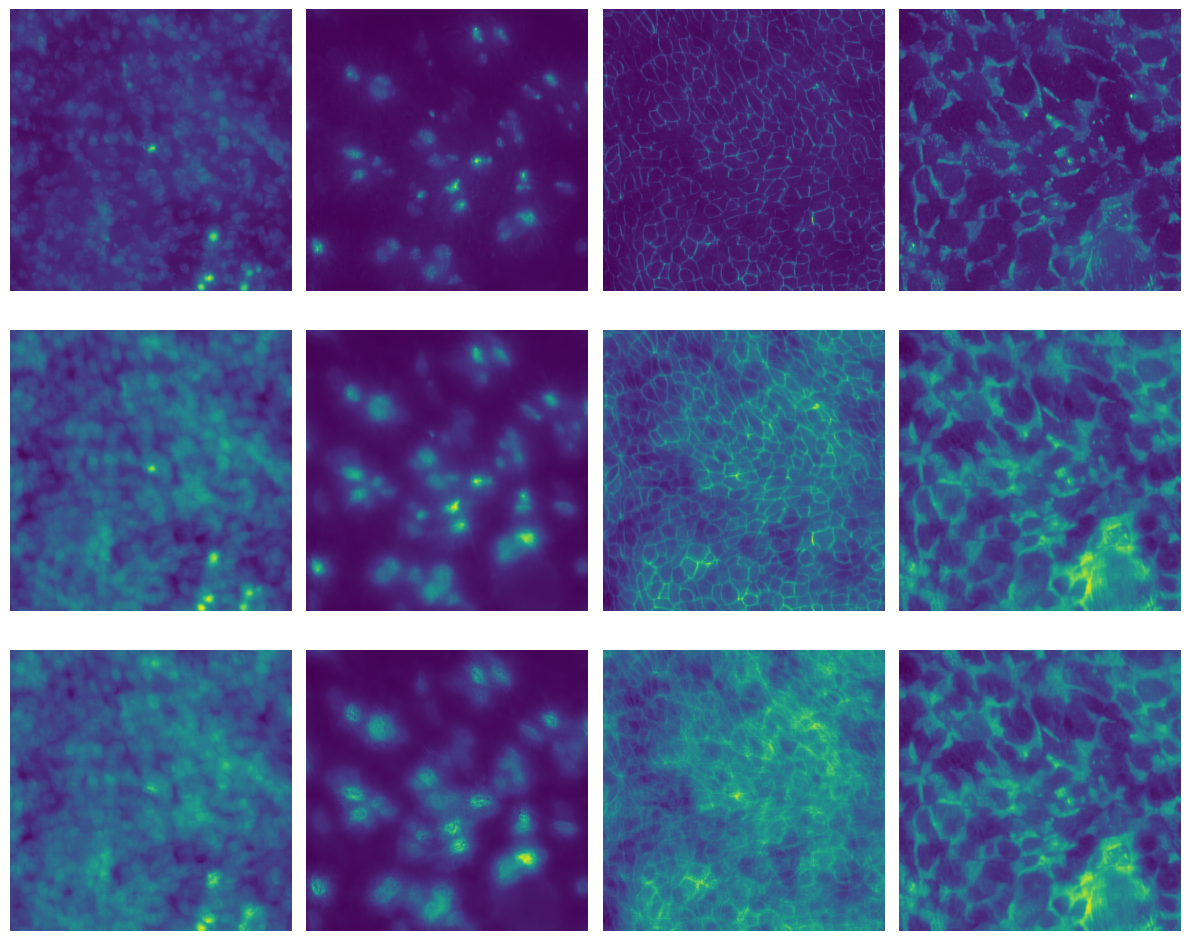

In [36]:
for idx in range(len(mip_imgs)): # 0-3, 4 images
    print("Image number:", img_selection[idx], "|", data["filename"][img_selection[idx]])
    mip_img, avg_img, med_img = mip_imgs[idx], avg_imgs[idx], med_imgs[idx]

    print("MIP image range:", [f"Ch{i}: {mip_img[i].min()} - {mip_img[i].max()}"for i in range(3)])
    print("Average image range:", [f"Ch{i}: {avg_img[i].min()} - {avg_img[i].max()}"for i in range(3)])
    print("Median image range:", [f"Ch{i}: {med_img[i].min()} - {med_img[i].max()}"for i in range(3)])

    channel_imgs = [mip_img[0], mip_img[1], mip_img[2], mip_img[3],
                    avg_img[0], avg_img[1], avg_img[2], avg_img[3],
                    med_img[0], med_img[1], med_img[2], avg_img[3]
    ]

    fig, ax = plt.subplots(3, 4, figsize=(12, 10))
    for i, a in enumerate(ax.flatten()):
        a.axis("off")
        a.imshow(np.moveaxis(channel_imgs[i], 0, -1))
    plt.tight_layout()
    plt.show()

## QUESTIONS

- Which projection for which signal? --> MIP for TJs, try MIP & avg for inf and cilia
- How to normalize the images? Use overall min/max or other statistics (over all samples) for each channel? --> inside batch/experiment, use mock for inf, think about what to use for cilia
- Cilia: are they mostly on the edge or even outside the cell? --> no, mostly on top, and therefore inside projection
- Threshold for infection: use mock as a reference (e.g. thresh = 3 SD above the mean of the mock cells)? --> yes, makes sense
- What do the filenames mean? Which should be averaged, and then which shall be compared (with mean and sd etc.)?
- Need to normalize by area? --> nope... depending on the questions

--> Go through notes on old scripts and see what we want to use as well, and what we can ignore or do better